# Decision Trees Exercises

Using the wine quality data set. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [12]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']


* Import the data and examine the features.
Use them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Importing the dataset
data = pd.read_csv('/Users/ebaniez/Downloads/Wine_Quality_Data.csv')

# Examine the first few rows to understand the features
print(data.head())

# Integer encoding the 'color' column
label_encoder = LabelEncoder()
data['color_encoded'] = label_encoder.fit_transform(data['color'])

# Display the dataset after encoding the 'color' column
print(data[['color', 'color_encoded']].head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 


* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the StratifiedShuffleSplit instance
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the instance to generate the train and test indices
for train_index, test_index in sss.split(data, data['quality']):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

# Check the percent composition of each quality level for the train set
train_composition = train_data['quality'].value_counts(normalize=True) * 100

# Check the percent composition of each quality level for the test set
test_composition = test_data['quality'].value_counts(normalize=True) * 100

print("Train set composition:\n", train_composition)
print("\nTest set composition:\n", test_composition)


Train set composition:
 6    43.659804
5    32.903598
7    16.605734
4     3.328844
8     2.963248
3     0.461805
9     0.076967
Name: quality, dtype: float64

Test set composition:
 6    43.615385
5    32.923077
7    16.615385
4     3.307692
8     3.000000
3     0.461538
9     0.076923
Name: quality, dtype: float64



* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets.

In [36]:
# Initialize a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Separate features and target for both train and test sets
features = [col for col in train_data.columns if col not in ['quality', 'color', 'color_encoded']]
X_train = train_data[features]
y_train = train_data['color_encoded']
X_test = test_data[features]
y_test = test_data['color_encoded']

# Fit the classifier
clf.fit(X_train, y_train)

# Determine number of nodes and depth of tree
num_nodes = clf.tree_.node_count
tree_depth = clf.tree_.max_depth

# Predict on train and test datasets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Number of nodes: {num_nodes}")
print(f"Depth of tree: {tree_depth}")
print(f"Training set accuracy: {train_accuracy * 100:.2f}%")
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")


Number of nodes: 149
Depth of tree: 21
Training set accuracy: 99.96%
Test set accuracy: 98.54%



* Using grid search with cross validation, find a decision tree that performs well on the test data set. 
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the previous tree.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters space
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train a decision tree with the best parameters
clf_optimized = DecisionTreeClassifier(**best_params, random_state=42)
clf_optimized.fit(X_train, y_train)

# Determine number of nodes and depth of tree
num_nodes_opt = clf_optimized.tree_.node_count
tree_depth_opt = clf_optimized.tree_.max_depth

# Predict on train and test datasets
y_train_pred_opt = clf_optimized.predict(X_train)
y_test_pred_opt = clf_optimized.predict(X_test)

# Calculate accuracy scores
train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)

print(f"Number of nodes (Optimized): {num_nodes_opt}")
print(f"Depth of tree (Optimized): {tree_depth_opt}")
print(f"Training set accuracy (Optimized): {train_accuracy_opt * 100:.2f}%")
print(f"Test set accuracy (Optimized): {test_accuracy_opt * 100:.2f}%")


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Number of nodes (Optimized): 109
Depth of tree (Optimized): 10
Training set accuracy (Optimized): 99.96%
Test set accuracy (Optimized): 98.38%



* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. 
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

In [40]:
print(X_train.columns)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'color', 'color_encoded'],
      dtype='object')


In [41]:
# One-hot encode the 'color' column
X_train_encoded = pd.get_dummies(X_train, columns=['color'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['color'], drop_first=True)


In [42]:
# Assuming you've already loaded the required libraries and your data into 'data'

# 2. Split data into features and target
X = data.drop(columns=['quality', 'residual_sugar'])
y = data['residual_sugar']

# 3. Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['quality'])

# 4. One-hot encode the 'color' column
X_train_encoded = pd.get_dummies(X_train, columns=['color'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['color'], drop_first=True)

# 5. Optional grid search (Example with Random Forest, adjust as needed)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train)

# Print the best parameters from the grid search
print(grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model and parameters
rf = RandomForestRegressor()
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Conduct the grid search
grid_search = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_encoded, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Continue with the prediction and error measurement...



Fitting 5 folds for each of 18 candidates, totalling 90 fits


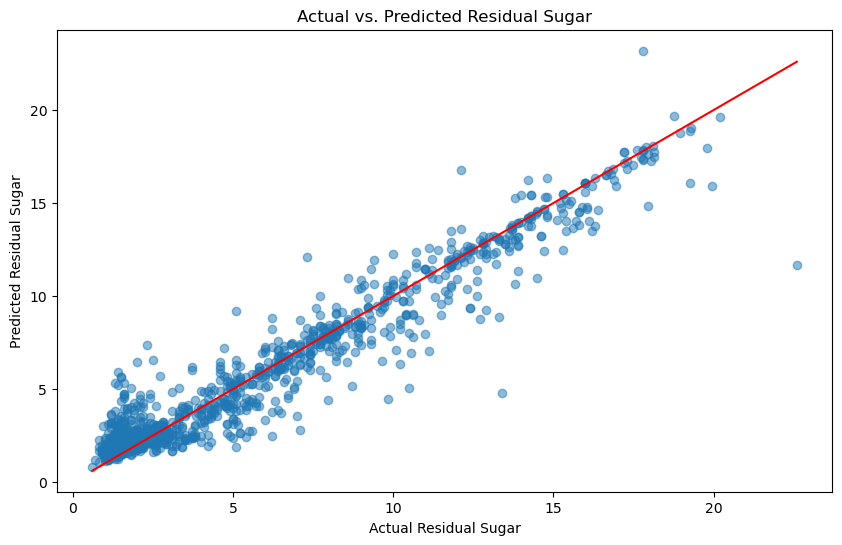

In [45]:
import matplotlib.pyplot as plt

# Assuming you've followed the previous steps and grid_search is your trained model
best_rf = grid_search.best_estimator_  # Get the best model from grid search
y_pred = best_rf.predict(X_test_encoded)  # Predict on the test set

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Residual Sugar')
plt.ylabel('Predicted Residual Sugar')
plt.title('Actual vs. Predicted Residual Sugar')
plt.show()



GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from 1st tree, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from second tree, where wine color was predicted but a grid search was used to find the optimal depth and number of features.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

In [ ]:
# Create a DOT data object
dot_data_unlimited = export_graphviz(tree_unlimited, out_file=None, 
                                     feature_names=X_train_encoded.columns,  
                                     class_names=['White', 'Red'],
                                     filled=True, rounded=True, special_characters=True)

# Generate and display the visual using PyDotPlus
graph_unlimited = pydotplus.graph_from_dot_data(dot_data_unlimited)  
Image(graph_unlimited.create_png())


In [ ]:
# Create a DOT data object for the best decision tree
dot_data_best = export_graphviz(best_tree, out_file=None, 
                                feature_names=X_train_encoded.columns,  
                                class_names=['White', 'Red'],
                                filled=True, rounded=True, special_characters=True)

# Generate and display the visual using PyDotPlus
graph_best = pydotplus.graph_from_dot_data(dot_data_best)  
Image(graph_best.create_png())